# Bibliotecas

In [1]:
import math    
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Funções

In [2]:
def gradient(f, x, y, h = 1e-6):                             # gradient function
    gradf = np.zeros((2,1))
    gradf[0] = np.imag(f(complex(x,h),y))/h
    gradf[1] = np.imag(f(x,complex(y,h)))/h
    return gradf

def delta_cte(f, delta, x0, y0, epsilon):                    # Line search
    
    # Phase 01
    
    counter = 1
    total = 0
    
    f_0 = f(x_0,y_0)
    gradf = -gradient(f, x_0, y_0)
    alfa_m = np.zeros(3)
    
    cond = True
    
    while cond:
        total = total + 1
        alfa = delta*counter
        x = x0 + alfa*gradf[0][0]
        y = y0 + alfa*gradf[1][0]
        f_1 = f(x,y)
        print("Iteraction {0:5d}: f(x) = {1:8.4f}, alfa = {2:8.4f}.".format(counter, f_1, alfa))
        if f_1 < f_0:
            f_0 = f_1
            counter = counter + 1
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
        else:
            counter = 1
            cond = False
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa 

    # Phase 02

    r = 0.1
    delta = delta*r
    cond = True
    alfa_0 = alfa_m[0]
    alfa_m = np.zeros(3)
    x = x_0 + alfa_0*gradf[0][0]
    y = y_0 + alfa_0*gradf[1][0]
    f_0 = f(x,y)
    i = 1
    while cond:
        total = total + 1
        alfa = alfa_0 + delta*counter
        x = x0 + alfa*gradf[0][0]
        y = y0 + alfa*gradf[1][0]
        f_1 = f(x,y)
        print("Iteraction {0:5d}: f(x) = {1:8.4f}, alfa = {2:8.4f}.".format(counter, f_1, alfa))
        if f_1 < f_0:
            f_0 = f_1
            counter = counter + 1
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
        elif f_1 > f_0 and (alfa_m[2] - alfa_m[0]) > epsilon:
            delta = r*delta
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
            alfa_0 = alfa_m[0]
            counter = 1
            i = i + 1
            print("Phase {0:5d}".format(i))
        elif f_1 > f_0 and (alfa_m[2] - alfa_m[0]) < epsilon: 
            cond = False
            alfa = alfa_m[1]
            x = x0 + alfa*gradf[0][0]
            y = y0 + alfa*gradf[1][0]
            f_1 = f(x,y)
    
    print("Number of iteractions = {0:5d}.".format(total))

    return alfa

def delta_alt(f, delta, x0, y0, epsilon):                    # Line search alternative
    # Phase 01
    print("Phase 1")    

    counter = 1
    total = 0
    
    f_0 = f(x_0,y_0)
    gradf = -gradient(f, x_0, y_0)
    alfa_m = np.zeros(3)
    
    cond = True
    
    while cond:
        total = total + 1
        alfa = delta*counter
        x = x0 + alfa*gradf[0][0]
        y = y0 + alfa*gradf[1][0]
        f_1 = f(x,y)
        print("Iteraction {0:5d}: f(x) = {1:8.4f}, alfa = {2:8.4f}.".format(counter, f_1, alfa))
        if f_1 < f_0:
            f_0 = f_1
            counter = counter + 1
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
        else:
            counter = 1
            cond = False
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa 

    # Phase 02
    
    cond = True
    alfa_range = np.array([alfa_m[0], alfa_m[2]])
    
    while cond:
        total = total + 1
        I = alfa_range[1] - alfa_range[0]
        alfa_a = alfa_range[0] + I/3
        alfa_b = alfa_range[0] + 2*I/3
        
        x_a = x0 + alfa_a*gradf[0][0]
        y_a = y0 + alfa_a*gradf[1][0]
        
        x_b = x0 + alfa_b*gradf[0][0]
        y_b = y0 + alfa_b*gradf[1][0]
        
        f_a = f(x_a,y_a)
        f_b = f(x_b,y_b)
        
        print("Iteraction {0:5d}: alfa a = {1:8.2f}, alfa b = {2:8.2f}".format(counter, alfa_a, alfa_b))
        
        if f_a > f_b and I > epsilon:
            alfa_range[0] = alfa_a
            
        elif f_a < f_b and I > epsilon:
            alfa_range[1] = alfa_b
            
        elif I < epsilon:
            cond = False
            alfa = (alfa_a + alfa_b)/2
            x = x0 + alfa*gradf[0][0]
            y = y0 + alfa*gradf[1][0]
            f_1 = f(x,y)
    
    print("Number of iteractions = {0:5d}.".format(total))
    
    return alfa


def golden_method(f, delta, x0, y0, epsilon):                    # Golden section method
    
    gsm = (math.sqrt(5) + 1)/2                          
    
    # Phase 01
    
    total = 0
    counter = 0
    f_0 = f(x0,y0)
    cond = True
    gradf = -gradient(f, x0, y0)
    alfa_m = np.zeros(3)
    alfa = 0
    
    while cond:
        total = total + 1
        
        alfa = alfa + delta*gsm**counter
        x = x0 + alfa*gradf[0][0]
        y = y0 + alfa*gradf[1][0]
        f_1 = f(x,y)
        
        if f_1 < f_0:
            f_0 = f_1
            counter = counter + 1
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa
        else:
            counter = 0    
            cond = False
            alfa_m[0] = alfa_m[1]
            alfa_m[1] = alfa_m[2]
            alfa_m[2] = alfa  
            
     # Phase 02
    
    alfa_range = np.array([alfa_m[0], alfa_m[2]])
    cond = True
    
    while cond:
        total = total + 1
        counter = counter + 1
        
        I = alfa_range[1] - alfa_range[0]
        
        alfa_a = alfa_range[0] + (1 - 1/gsm)*I
        
        x_a = x0 + alfa_a*gradf[0][0]
        y_a = y0 + alfa_a*gradf[1][0]
        
        f_a = f(x_a,y_a)
        
        alfa_b = alfa_range[0] + 1/gsm*I
        
        x_b = x0 + alfa_b*gradf[0][0]
        y_b = y0 + alfa_b*gradf[1][0]
        
        f_b = f(x_b,y_b)
        
        print("Iteraction {0:5d}: alfa a = {1:8.2f}, alfa b = {2:8.2f}".format(counter, alfa_a, alfa_b))
        
        if f_a > f_b and I > epsilon:
            alfa_range[0] = alfa_a
            
        elif f_a < f_b and I > epsilon:
            alfa_range[1] = alfa_b
            
        elif I < epsilon:
            cond = False
            alfa = (alfa_a + alfa_b)/2
            x = x0 + alfa*gradf[0][0]
            y = y0 + alfa*gradf[1][0]
            f_1 = f(x,y)
    
    print("Number of iteractions = {0:5d}.".format(total))
    
    return alfa

In [3]:
def f(x,y):                                         # objective function 
    f = 10*x**4 - 20*x**2*y + 10*y**2 + x**2 - 2*x + 5
    return f

x_0 = -1.5
y_0 = 3

delta = 0.001
epsilon = 2e-4

In [4]:
delta_cte(f, delta, x_0, y_0, epsilon) 

Phase 1
Iteraction     1: f(x) =  14.2142, alfa =   0.0010.
Iteraction     2: f(x) =  12.8994, alfa =   0.0020.
Iteraction     3: f(x) =  11.9574, alfa =   0.0030.
Iteraction     4: f(x) =  11.4156, alfa =   0.0040.
Iteraction     5: f(x) =  11.3023, alfa =   0.0050.
Iteraction     6: f(x) =  11.6459, alfa =   0.0060.
Iteraction     1: f(x) =  11.3846, alfa =   0.0041.
Iteraction     2: f(x) =  11.3578, alfa =   0.0042.
Iteraction     3: f(x) =  11.3353, alfa =   0.0043.
Iteraction     4: f(x) =  11.3173, alfa =   0.0044.
Iteraction     5: f(x) =  11.3036, alfa =   0.0045.
Iteraction     6: f(x) =  11.2944, alfa =   0.0046.
Iteraction     7: f(x) =  11.2896, alfa =   0.0047.
Iteraction     8: f(x) =  11.2893, alfa =   0.0048.
Iteraction     9: f(x) =  11.2935, alfa =   0.0049.
Phase     2
Iteraction     1: f(x) =  11.2894, alfa =   0.0047.
Number of iteractions =    32.


0.0048000000000000004

In [5]:
delta_alt(f, delta, x_0, y_0, epsilon)

Phase 1
Iteraction     1: f(x) =  14.2142, alfa =   0.0010.
Iteraction     2: f(x) =  12.8994, alfa =   0.0020.
Iteraction     3: f(x) =  11.9574, alfa =   0.0030.
Iteraction     4: f(x) =  11.4156, alfa =   0.0040.
Iteraction     5: f(x) =  11.3023, alfa =   0.0050.
Iteraction     6: f(x) =  11.6459, alfa =   0.0060.
Iteraction     1: alfa a =     0.00, alfa b =     0.01
Iteraction     1: alfa a =     0.00, alfa b =     0.00
Iteraction     1: alfa a =     0.00, alfa b =     0.01
Iteraction     1: alfa a =     0.00, alfa b =     0.00
Iteraction     1: alfa a =     0.00, alfa b =     0.00
Iteraction     1: alfa a =     0.00, alfa b =     0.00
Iteraction     1: alfa a =     0.00, alfa b =     0.00
Number of iteractions =    19.


0.004729766803840877

In [6]:
golden_method(f, delta, x_0, y_0, epsilon)

Iteraction     1: alfa a =     0.01, alfa b =     0.01
Iteraction     2: alfa a =     0.00, alfa b =     0.01
Iteraction     3: alfa a =     0.01, alfa b =     0.01
Iteraction     4: alfa a =     0.00, alfa b =     0.01
Iteraction     5: alfa a =     0.00, alfa b =     0.00
Iteraction     6: alfa a =     0.00, alfa b =     0.00
Iteraction     7: alfa a =     0.00, alfa b =     0.00
Iteraction     8: alfa a =     0.00, alfa b =     0.00
Iteraction     9: alfa a =     0.00, alfa b =     0.00
Number of iteractions =    13.


0.004781152949374526

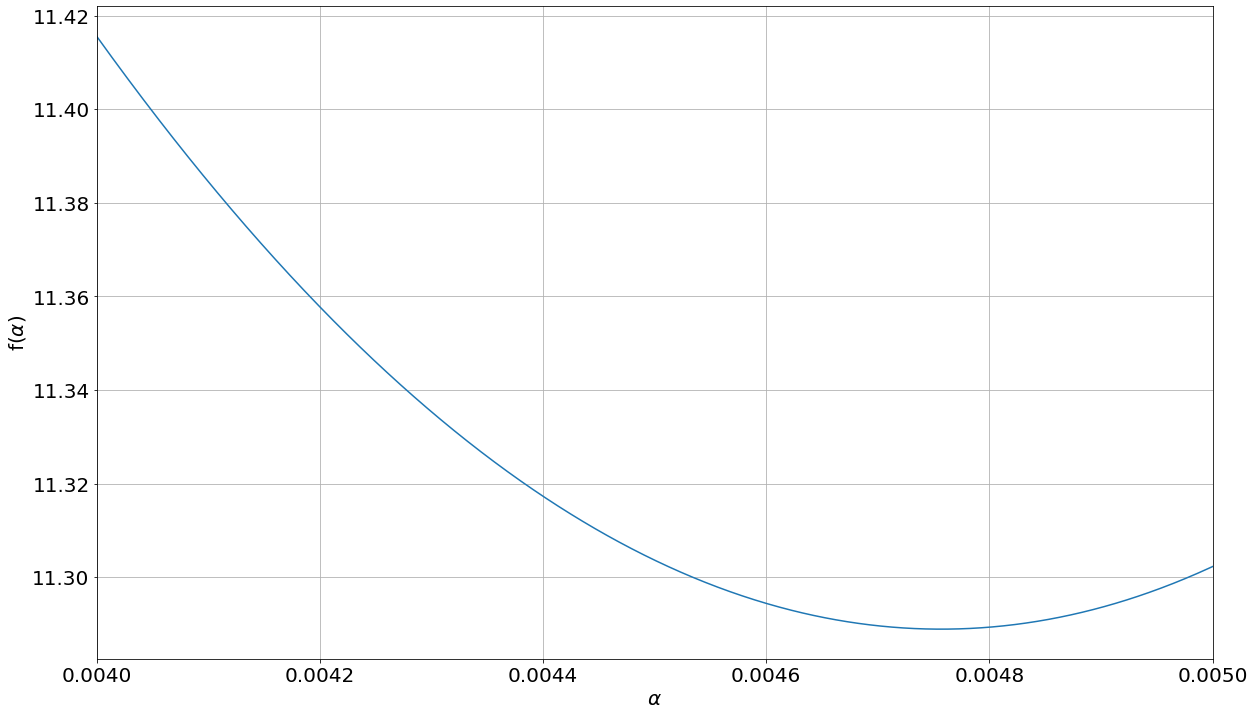

In [7]:
x = np.linspace(0.004,0.005, 1000)
y = np.zeros(1000)
y[:] = 11.2889
f = 10*(-1.5 - 40*x)**4 - 20*(-1.5 - 40*x)**2*(3 - 15*x) + 10*(3 - 15*x)**2 + (-1.5 - 40*x)**2 - 2*(-1.5 - 40*x) + 5
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.plot(x, f)
plt.grid()
plt.xlabel(r'$\alpha$', Fontsize = 20)
plt.xticks(fontsize=20)
plt.xlim(0.004, 0.005)
plt.ylabel(r'f($\alpha$)', Fontsize = 20)
plt.yticks(fontsize=20)
fig.savefig('mp_288_1.png',dpi=300)                              # salvar figura como png (dpi = número de pixels)